In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_csv = "data/mouse_drug_data.csv"
clinical_trial_csv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_csv)
clincial_trial_df = pd.read_csv(clinical_trial_csv)



In [3]:
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
clincial_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_clinical_data = pd.merge(clincial_trial_df, mouse_drug_df, on="Mouse ID")

# Display the data table for preview
combined_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_groups = combined_clinical_data.groupby(["Drug", "Timepoint"])
mean_tumor_volume = drug_timepoint_groups["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume).reset_index()
# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SEM_tumor_volumes = drug_timepoint_groups["Tumor Volume (mm3)"].sem().reset_index()
# Convert to DataFrame
SEM_tumor_volumes_df = pd.DataFrame(SEM_tumor_volumes)

# Preview DataFrame
SEM_tumor_volumes_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
volume_pivot = mean_tumor_volume_df.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
sem_volume_pivot = SEM_tumor_volumes_df.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
sem_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


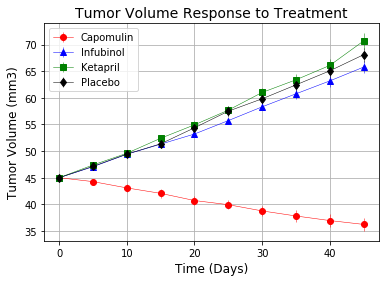

In [150]:
# Generate the Plot (with Error Bars)

#generate the x-axis
x_axis = combined_clinical_data["Timepoint"].unique()

#generate the standard error bars
capomulin_sem = sem_volume_pivot["Capomulin"].unique()
infubinoln_sem = sem_volume_pivot["Infubinol"].unique()
ketapril_sem = sem_volume_pivot["Ketapril"].unique()
placebo_sem = sem_volume_pivot["Placebo"].unique()

#range for the drug
capomulin = volume_pivot["Capomulin"].unique()
infubinoln = volume_pivot["Infubinol"].unique()
ketapril = volume_pivot["Ketapril"].unique()
placebo = volume_pivot["Placebo"].unique()

#create all the pieces for the line graph
plt.errorbar(x_axis, capomulin, yerr=capomulin_sem, linewidth=0.5, color="red", marker="o", label="Capomulin")
plt.errorbar(x_axis, infubinoln, yerr=infubinoln_sem, linewidth=0.5, color="blue", marker="^", label="Infubinol")
plt.errorbar(x_axis, ketapril, yerr=ketapril_sem, linewidth=0.5, color="green", marker="s", label="Ketapril")
plt.errorbar(x_axis, placebo, yerr=placebo_sem, linewidth=0.5, color="black", marker="d", label="Placebo")
plt.legend(loc="best")


#add titles to the chart and add grid lines
plt.title("Tumor Volume Response to Treatment", fontsize=14)
plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

plt.grid()
# Save the Figure
plt.savefig("Images/TumorVolumeResponsetoTx.png")

#show the graph

plt.show()

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = drug_timepoint_groups["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site).reset_index()
# Preview DataFrame
mean_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SEM__mean_met_sites =drug_timepoint_groups["Metastatic Sites"].sem().reset_index()

# Convert to DataFrame
SEM_met_site_df = pd.DataFrame(SEM__mean_met_sites).reset_index()
# Preview DataFrame
SEM_met_site_df.head()

,index,Drug,Timepoint,Metastatic Sites
0,0,Capomulin,0,0.000000
1,1,Capomulin,5,0.074833
2,2,Capomulin,10,0.125433
3,3,Capomulin,15,0.132048
4,4,Capomulin,20,0.161621


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site_pivot= mean_met_site_df.pivot(index="Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
mean_met_site_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [14]:
# Minor Data Munging to Re-Format the Data Frames
SEM_met_site_pivot = SEM_met_site_df.pivot(index="Timepoint", columns = "Drug", values = "Metastatic Sites")
# Preview that Reformatting worked
SEM_met_site_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


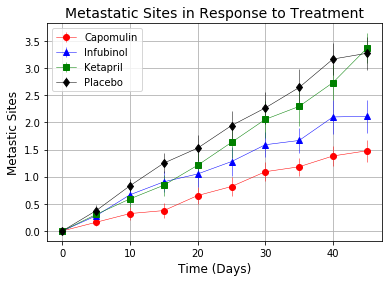

In [151]:
# Generate the Plot (with Error Bars)
# Generate the Plot (with Error Bars)

#generate the x-axis
x_axis_2 = combined_clinical_data["Timepoint"].unique()

#generate the standard error bars
capomulin_sem_2 = SEM_met_site_pivot["Capomulin"].unique()
infubinoln_sem_2 = SEM_met_site_pivot["Infubinol"].unique()
ketapril_sem_2 = SEM_met_site_pivot["Ketapril"].unique()
placebo_sem_2 = SEM_met_site_pivot["Placebo"].unique()

#range for the drug
capomulin_2 = mean_met_site_pivot["Capomulin"].unique()
infubinoln_2 = mean_met_site_pivot["Infubinol"].unique()
ketapril_2 = mean_met_site_pivot["Ketapril"].unique()
placebo_2 = mean_met_site_pivot["Placebo"].unique()

#create all the pieces for the line graph
plt.errorbar(x_axis, capomulin_2, yerr=capomulin_sem_2, linewidth=0.5, color="red", marker="o", label="Capomulin")
plt.errorbar(x_axis, infubinoln_2, yerr=infubinoln_sem_2, linewidth=0.5, color="blue", marker="^", label="Infubinol")
plt.errorbar(x_axis, ketapril_2, yerr=ketapril_sem_2, linewidth=0.5, color="green", marker="s", label="Ketapril")
plt.errorbar(x_axis, placebo_2, yerr=placebo_sem_2, linewidth=0.5, color="black", marker="d", label="Placebo")
plt.legend(loc="best")



#add titles to the chart and add grid lines
plt.title("Metastatic Sites in Response to Treatment", fontsize=14)
plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("Metastic Sites", fontsize=12)

plt.grid()
# Save the Figure
plt.savefig("Images/MetasticSitestoTx.png")

#show the graph

plt.show()





## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_of_mice = drug_timepoint_groups["Mouse ID"].count().reset_index()
count_of_mice
# Convert to DataFrame
count_of_mice = pd.DataFrame(count_of_mice)
# Preview DataFrame
count_of_mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_pivot= count_of_mice.pivot(index="Timepoint", columns = "Drug", values = "Mouse ID")
# Preview the Data Frame
count_mice_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [18]:
#generate survial percentage arrays for Capomulin

capomulin_list = []

for c in count_mice_pivot["Capomulin"]:
    capomulin_percent = (c/25)*100
    capomulin_list.append(capomulin_percent)

    
capomulin_list

[100.0, 100.0, 100.0, 96.0, 92.0, 88.0, 88.0, 88.0, 84.0, 84.0]

In [19]:
#generate survial percentage arrays for Ketapril

infubinol_list = []

for i in count_mice_pivot["Infubinol"]:
    infubinol_percent = (i/25)*100
    infubinol_list.append(infubinol_percent)
    

infubinol_list

[100.0, 100.0, 84.0, 84.0, 80.0, 72.0, 68.0, 48.0, 40.0, 36.0]

In [20]:
#generate survial percentage arrays for Ketapril
ketapril_list = []

for k in count_mice_pivot["Ketapril"]:
    ketapril_percent = (k/25)*100
    ketapril_list.append(ketapril_percent)
    
ketapril_list

[100.0, 92.0, 88.0, 76.0, 76.0, 76.0, 72.0, 68.0, 60.0, 44.0]

In [21]:
#generate survial percentage arrays for Placebo
placebo_list = []

for p in count_mice_pivot["Placebo"]:
    placebo_percent = (p/25)*100
    placebo_list.append(placebo_percent)
    
placebo_list

[100.0, 96.0, 96.0, 80.0, 76.0, 68.0, 60.0, 56.00000000000001, 48.0, 44.0]

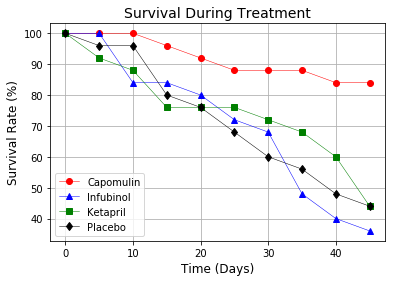

In [149]:
# Generate the Plot (Accounting for percentages)

#create x-axis time points
x_axis_3 = combined_clinical_data["Timepoint"].unique()


plt.plot(x_axis, capomulin_list, linewidth=0.5, color="red", marker="o", label="Capomulin")
plt.plot(x_axis, infubinol_list, linewidth=0.5, color="blue", marker="^", label="Infubinol")
plt.plot(x_axis, ketapril_list, linewidth=0.5, color="green", marker="s", label="Ketapril")
plt.plot(x_axis, placebo_list, linewidth=0.5, color="black", marker="d", label="Placebo")
plt.legend(loc="best")


plt.title("Survival During Treatment", fontsize=14)
plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("Survival Rate (%)", fontsize=12)


plt.grid()
# Save the Figure
plt.savefig("Images/SurvivaltoTx.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [73]:
# Calculate the percent changes for each drug
starting_tumor_volume = volume_pivot.iloc[0]

ending_tumor_volume = volume_pivot.iloc[9]

percent_change_tumor_volume = round(((ending_tumor_volume-starting_tumor_volume)/starting_tumor_volume)*100,2)
# Display the data to confirm
percent_change_tumor_volume.to_frame()
relevant_drugs = percent_change_tumor_volume.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
relevant_drugs_df = pd.DataFrame(relevant_drugs).reset_index()

relevant_drugs_df.rename(columns={0:"%_volume_change"}, inplace=True)
relevant_drugs_df



,Drug,%_volume_change
0,Capomulin,-19.48
1,Infubinol,46.12
2,Ketapril,57.03
3,Placebo,51.30


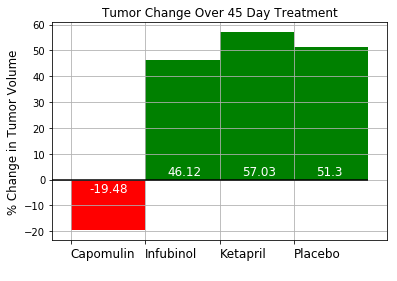

In [159]:
#Plot change to a bar graph

volume_plot = relevant_drugs_df.plot(kind="bar", x="Drug", y="%_volume_change", width=1, align= "edge", color = (relevant_drugs_df["%_volume_change"] > 0).map({True: "green", 
                                                                                                                                      False: "red"}), legend=None, title="Tumor Change Over 45 Day Treatment")

volume_plot.grid()
volume_plot.hlines(0, -1, 4, alpha=1.0)

volume_plot.set_xlabel(" ")
volume_plot.set_ylabel("% Change in Tumor Volume", fontsize=11.75)


for tick in volume_plot.get_xticklabels():
    tick.set_rotation(0)
   
plt.xticks(ha="left", fontsize=12)

labels = relevant_drugs_df["%_volume_change"]

for i, j in enumerate(labels):
    if i > 0:
        y = 3
        x = 0.3
    else:
        y = -3.5
        x= 0.25
    volume_plot.text(i+x, y, labels[i],fontsize=12, va="center",
             color="white")

plt.savefig("Images/Summary%ChangeBarGraph.png")

